## Task 3
### EDA for Stock Prices data and Build a predictive model that can predict stock prices Using Linear Regression Algorithm

### Import Packages

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

### Load & Inspect Data

In [2]:
df = pd.read_csv('INR=X.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [6]:
df.shape

(262, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [8]:
df.duplicated().sum()

0

### EDA

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df.drop('Volume', axis=1).describe().round(1)

,Open,High,Low,Close,Adj Close
count,262.0,262.0,262.0,262.0,262.0
mean,74.4,74.6,74.0,74.4,74.4
std,1.4,1.5,1.3,1.4,1.4
min,71.1,71.3,71.1,71.1,71.1
25%,73.5,73.7,73.2,73.5,73.5
50%,74.3,74.5,73.9,74.3,74.3
75%,75.5,75.7,75.1,75.5,75.5
max,77.7,77.8,76.5,77.6,77.6


<AxesSubplot: title={'center': 'Close Distribution'}, xlabel='Close'>

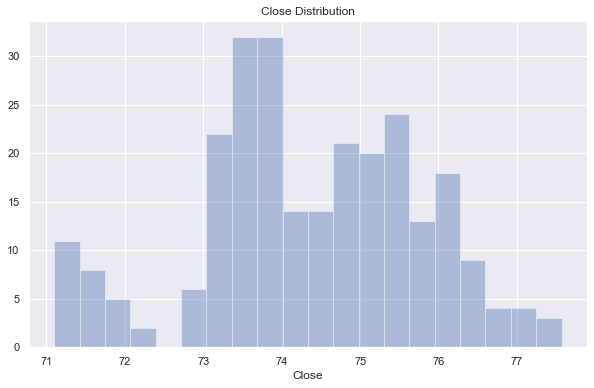

In [16]:
# How does the distribution of the 'Close' prices look like?
plt.figure(figsize=(10,6))
plt.title('Close Distribution')
sns.distplot(df['Close'],bins=20,kde=False)

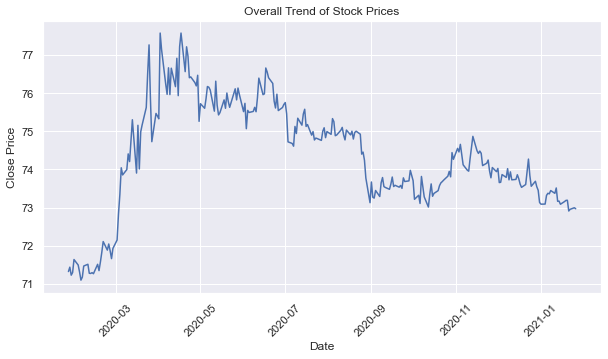

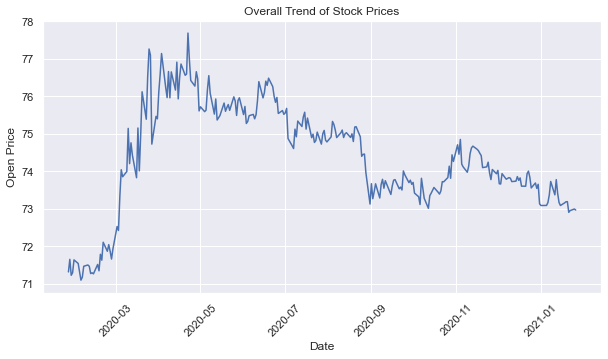

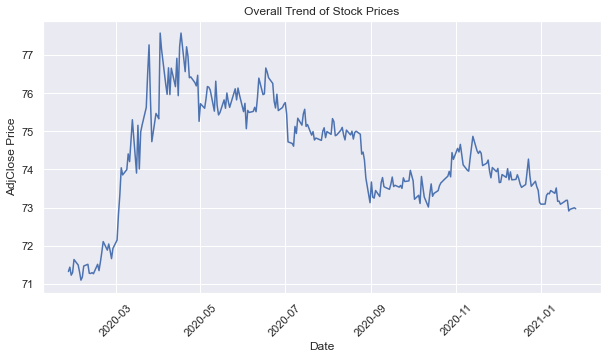

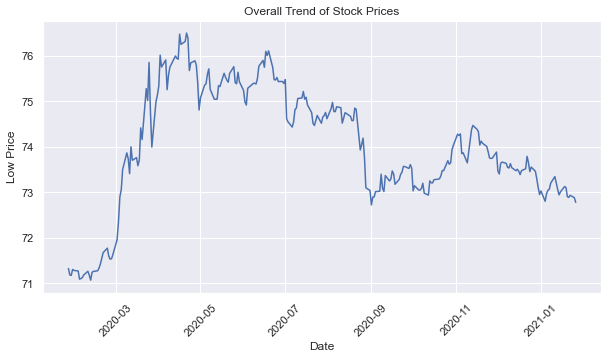

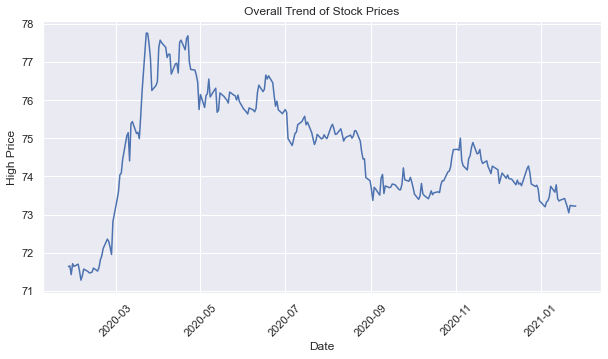

In [41]:
# What is the overall trend of the stock prices
plt.figure(figsize=(10,5))
plt.plot(df['Date'],df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Overall Trend of Stock Prices')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10,5))
plt.plot(df['Date'],df['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Overall Trend of Stock Prices')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10,5))
plt.plot(df['Date'],df['Adj Close'])
plt.xlabel('Date')
plt.ylabel('AdjClose Price')
plt.title('Overall Trend of Stock Prices')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df['Date'],df['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Overall Trend of Stock Prices')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df['Date'],df['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('Overall Trend of Stock Prices')
plt.xticks(rotation=45)
plt.show()

Correlation between Open and Close prices: 0.9889204694496974


<AxesSubplot: xlabel='Open', ylabel='Close'>

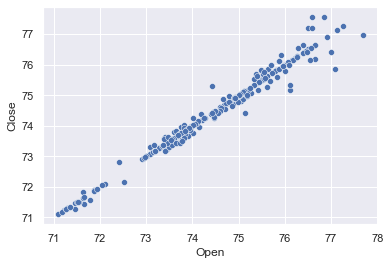

In [24]:
# Is there a correlation between the 'Open' and 'Close' prices? How strong is the correlation?
correlation = np.corrcoef(df['Open'], df['Close'])[0, 1]
print('Correlation between Open and Close prices:', correlation)
sns.scatterplot(data=df,x='Open',y='Close')

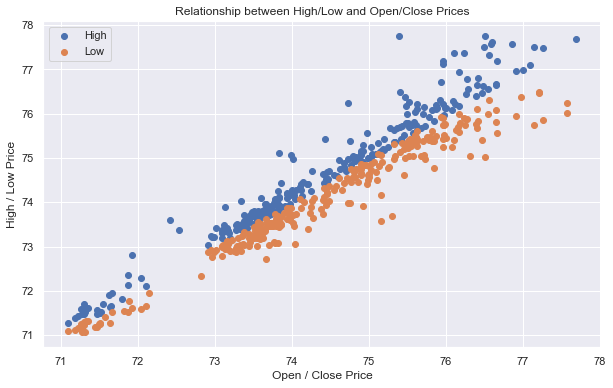

In [26]:
# How do the 'High' and 'Low' prices vary in relation to the 'Open' and 'Close' prices?
plt.figure(figsize=(10,6))
plt.scatter(df['Open'], df['High'], label='High')
plt.scatter(df['Close'], df['Low'], label='Low')
plt.xlabel('Open / Close Price')
plt.ylabel('High / Low Price')
plt.title('Relationship between High/Low and Open/Close Prices')
plt.legend()
plt.show()


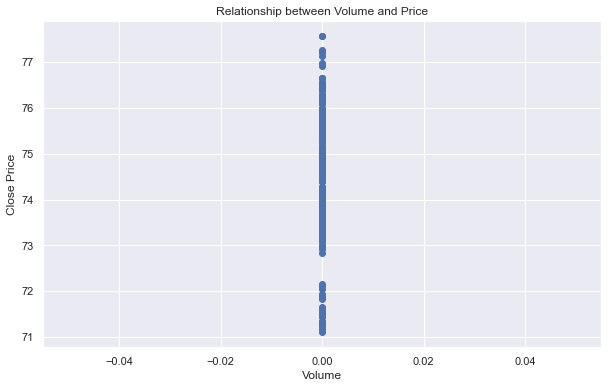

In [28]:
# Is there any relationship between the volume of stocks traded ('Volume') and price fluctuations?
plt.figure(figsize=(10,6))
plt.scatter(df['Volume'], df['Close'])
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Relationship between Volume and Price')
plt.show()

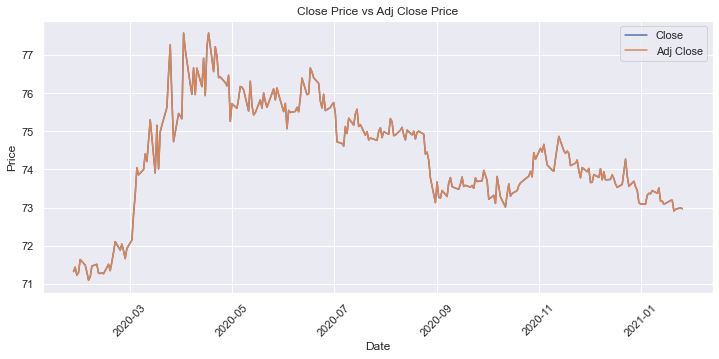

In [30]:
# How does the 'Adj Close' price differ from the 'Close' price? Are there any notable discrepancies?
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['Adj Close'], label='Adj Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price vs Adj Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


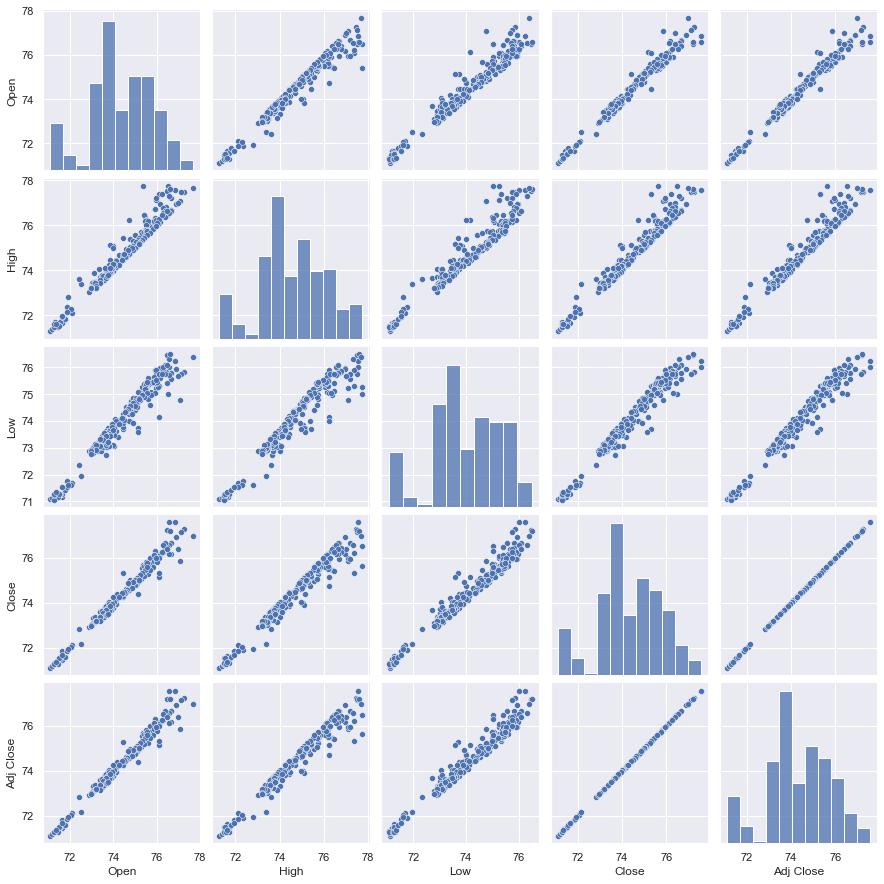

In [32]:
# Add some Visualizations
sns.pairplot(df.drop('Volume',axis=1))

<AxesSubplot: title={'center': 'Variables Correlation'}>

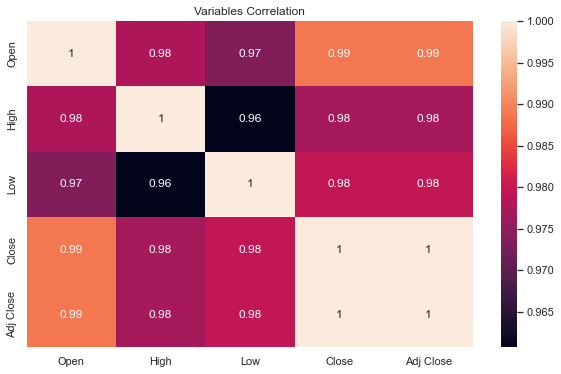

In [39]:
plt.figure(figsize=(10,6))
plt.title('Variables Correlation')
sns.heatmap(df.drop('Volume',axis=1).corr(),annot=True)

### Build & Train The Model

In [42]:
# Adj Close == Close so we will drop one of them and the other one will be our target
df.drop('Adj Close',axis=1,inplace=True)

In [50]:
X = df.drop({'Close','Date'},axis=1)
y = df['Close']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
model = LinearRegression()

In [53]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
predictions = model.predict(X_test)

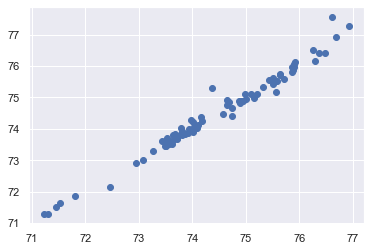

In [56]:
plt.scatter(predictions,y_test)

<AxesSubplot: xlabel='Close'>

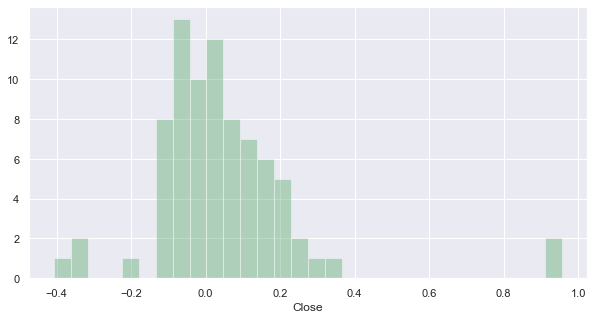

In [66]:
plt.figure(figsize=(10,5))
sns.distplot(y_test-predictions,bins=30,kde=False,color='g')

### Evaluate The Model

In [60]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',RMSE)

RMSE:  0.20113223307495384


In [61]:
MSE = metrics.mean_squared_error(y_test,predictions)
print('MSE: ',MSE)

MSE:  0.04045417518171755


In [62]:
MAE = metrics.mean_absolute_error(y_test,predictions)
print('MAE: ',MAE)

MAE:  0.1234563534234464


In [63]:
metrics.explained_variance_score(y_test,predictions)

0.9777406790858025

In [64]:
r_squared = metrics.r2_score(y_test, predictions)
print("R-squared value:", r_squared)

R-squared value: 0.9764106174453537


In [65]:
pd.DataFrame(model.coef_.round(3),X.columns,columns=(['Coeff']))

,Coeff
Open,0.560
High,0.122
Low,0.337
Volume,0.000


# BY Mohamed Batran 

# 